In [408]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')
import random
from numpy import random
import math
import random
import matplotlib.patches as mpatches

In [535]:
Kb = 1.38e-23
# this mass is that of Krypton
mass = 1.391e-25

In [ ]:
# I assumed that this should be in 3D 
# I also have the speed set to 0-700 which can be changed at line [speed]

In [542]:
def Maxwell_Speed(m,Kb,t,v):
    temp = 2*np.pi*Kb*t
    mass = m
    left = (mass/temp)**(3/2)
    beta = (-1*Kb*t*2)
    mv2 = (v**2)*mass
    both = left*np.exp(mv2/beta)
    return np.pi*4*(v**2)*both

In [551]:
speed = np.linspace(0,700,1001)
speed_probability = Maxwell_Speed(mass,Kb,300,speed)

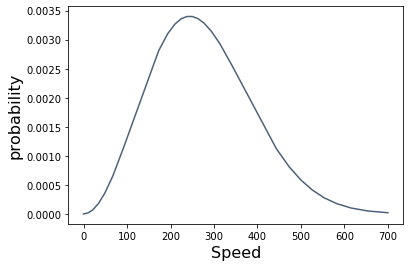

In [573]:
Speed_Kr = Table().with_columns("Speed",speed,"probability", speed_probability)
Speed_Kr.plot("Speed")

In [574]:
the_average = np.mean(speed_probability)
the_average

0.0014258542939356118

In [589]:
showing_average = Speed_Kr.where("probability",are.between(0.001424,0.001425))
showing_average

Speed,probability
419.3,0.00142483


In [590]:
Standard_dev = np.std(speed_probability)
Standard_dev

0.001211332135505296

In [596]:
showing_std = Speed_Kr.where("probability",are.between(0.001210,0.001218))
showing_std

Speed,probability
436.1,0.0012107


In [ ]:
# 3a making the graph

In [409]:
Kb = 1.38e-23
# this mass is that of Krypton
mass = 1.391e-25

In [410]:
def Maxwell1D (m,Kb,t,v):
    bottom_left = 2*np.pi*Kb*t
    top_left = m
    together_left = np.sqrt(top_left/bottom_left)
    bottom_right = (-1*Kb*t*2)
    top_right = (v**2)*m
    return together_left*np.exp(top_right/bottom_right)

In [411]:
velocity = np.linspace(-1000,1000,1001)
probability = Maxwell1D(mass,Kb,150,velocity)
maximum = max(probability)
maximum

0.0032703065039827095

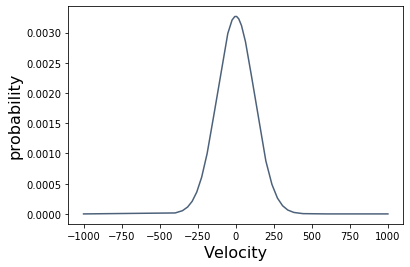

In [412]:
Tableofxclassic = Table().with_columns("Velocity",velocity,"probability", probability)
Tableofxclassic.plot(0)

In [ ]:
# 3b making the random function and sampling. 

In [413]:
def rand_sample_function():
    while True:
        # generate random numbers
        rand_x = np.random.rand()
        rand_y = np.random.rand()
        # scale random points
        scaled_x = (-1000) + rand_x*(1000+1000)
        scaled_y = (0) + rand_y*(maximum)
        
        if scaled_y < Maxwell1D(mass, Kb, 150, scaled_x):
            return scaled_x

In [414]:
x_values = []
for i in range(1000):
    x_values.append(rand_sample_function())

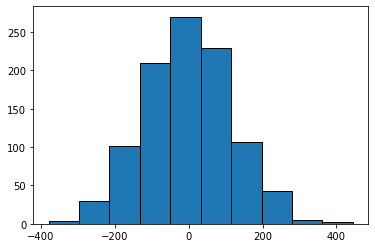

In [415]:
plt.hist(x_values, bins = 10)
plt.show()

In [416]:
##### 3C

In [417]:
# k=R/n n=1 fo k=R change
# k is now 8314 and mass is now in g/mol
k = 8314

In [418]:
def standardmaxwell (m,k,t,v):
    bottom_left = 2*np.pi*k*t
    top_left = m
    together_left = np.sqrt(top_left/bottom_left)
    bottom_right = (-1*k*t*2)
    top_right = (v**2)*m
    return together_left*np.exp(top_right/bottom_right)

In [419]:
testing = standardmaxwell(84,k,150,velocity)
the_maxstandard = max(testing)
the_maxstandard

0.0032741537483442426

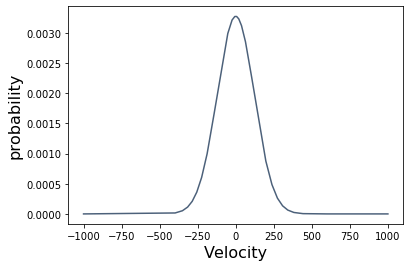

In [420]:
testingx = Table().with_columns("Velocity",velocity,"probability", testing)
testingx.plot(0)

In [421]:
def rand_standard_sample_function():
    while True:
        # generate random numbers
        randn_x = np.random.randn()
        randn_y = np.random.randn()
        # scale random points
        scaled_x = (-1) + randn_x*(2)
        scaled_y = (0) + randn_y*(the_maxstandard)
        
        if scaled_y < standardmaxwell(84, k, 150, scaled_x):
            return scaled_x

In [422]:
xn_values = []
for i in range(1000):
    xn_values.append(rand_standard_sample_function())

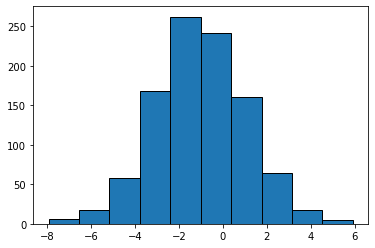

In [423]:
plt.hist(xn_values, bins = 10)
plt.show()

In [23]:
##### 3D

In [424]:
# interval is 
k = 8314
T = 150
new_mass = 84
# krypton = 84

In [425]:
KBT = np.sqrt(k*T/84) / 1000
ranges = 2.5*KBT
ranges

0.3046148035986245

In [426]:
def standardmaxwell (m,k,t,v):
    bottom_left = 2*np.pi*k*t
    top_left = m
    together_left = np.sqrt(top_left/bottom_left)
    bottom_right = (-1*k*t*2)
    top_right = (v**2)*m
    return together_left*np.exp(top_right/bottom_right)

In [427]:
testing = standardmaxwell(84,k,150,velocity)
the_maxstandard = max(testing)
the_maxstandard

0.0032741537483442426

In [ ]:
# 3d making a thermostat

In [428]:
def thermostat():
    while True:
        # generate random numbers
        thermo_x = random.uniform((-1)*ranges, ranges)
        thermo_y = random.uniform(0, the_maxstandard)
        # scale random points - not needed
        scaled_x = (-1)*ranges + thermo_x*(2*ranges)
        scaled_y = thermo_y*(the_maxstandard)
        
        actual_y = standardmaxwell(new_mass, k, 150, scaled_x)
        if scaled_y < actual_y:
            return scaled_x

In [429]:
x_component = []
for i in range(1000):
    x_component.append(thermostat())

In [430]:
y_component = []
for i in range(1000):
    y_component.append(thermostat())

In [431]:
z_component = []
for i in range(1000):
    z_component.append(thermostat())

In [432]:
z_component

[-0.4277463837520811,
 -0.35324567496441345,
 -0.29870257605801875,
 -0.16411784700753834,
 -0.20219803497339536,
 -0.2682987772478631,
 -0.1578584993754828,
 -0.4055950053791665,
 -0.4198344972159017,
 -0.40923435441461403,
 -0.4446684524833163,
 -0.4116975453671967,
 -0.44273522752072325,
 -0.14257973477890346,
 -0.40361676621333875,
 -0.3259899405784939,
 -0.4205035980304873,
 -0.20131892638365495,
 -0.3843328767787317,
 -0.24779397742766998,
 -0.13483750420094343,
 -0.47154422853180833,
 -0.3866686308304895,
 -0.16518514945971366,
 -0.25764528038558177,
 -0.2812020956561096,
 -0.45217813728387035,
 -0.2939044781189857,
 -0.2592563467672793,
 -0.38587500874432,
 -0.20633233393159317,
 -0.29177341956029745,
 -0.1621670230261605,
 -0.13392119462943225,
 -0.36914809307172497,
 -0.1987047276591059,
 -0.48103828483902633,
 -0.32211334512616885,
 -0.3782956333125245,
 -0.2504048807065331,
 -0.20113309806094015,
 -0.16409378069638964,
 -0.4626766825326553,
 -0.28492577643514044,
 -0.349164

In [433]:
# 4A divide by 10

In [434]:
# 4B

In [435]:
def dv(Fx,dt,m):
    return (Fx/m)*dt

In [436]:
# 4c 

In [437]:
def dx (Fx,dt,m,v):
    top = Fx*(dt**2)
    total = top/(2*m)
    return v*dt + total

In [438]:
# 4D

In [439]:
def simulation(x,Fx,dt,m,v):
    step1 = dx(Fx,dt,m,v)
    step2 = dv(Fx,dt,m)
    step3 = step1+x
    step4 = step2+v
    return (step3, step4)

In [ ]:
#4 E

In [440]:
# this is my 3x3x3 cube
counter = 0
original = np.zeros([27,3])

for i in range(3):
    for j in range(3):
        for k in range(3):
            original[counter] = make_array(i,j,k)
            counter += 1

In [441]:
original_points = original*0.46
original_points

array([[0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.46],
       [0.  , 0.  , 0.92],
       [0.  , 0.46, 0.  ],
       [0.  , 0.46, 0.46],
       [0.  , 0.46, 0.92],
       [0.  , 0.92, 0.  ],
       [0.  , 0.92, 0.46],
       [0.  , 0.92, 0.92],
       [0.46, 0.  , 0.  ],
       [0.46, 0.  , 0.46],
       [0.46, 0.  , 0.92],
       [0.46, 0.46, 0.  ],
       [0.46, 0.46, 0.46],
       [0.46, 0.46, 0.92],
       [0.46, 0.92, 0.  ],
       [0.46, 0.92, 0.46],
       [0.46, 0.92, 0.92],
       [0.92, 0.  , 0.  ],
       [0.92, 0.  , 0.46],
       [0.92, 0.  , 0.92],
       [0.92, 0.46, 0.  ],
       [0.92, 0.46, 0.46],
       [0.92, 0.46, 0.92],
       [0.92, 0.92, 0.  ],
       [0.92, 0.92, 0.46],
       [0.92, 0.92, 0.92]])

In [442]:
#Kryptons MW is 84 so I will be using that

In [443]:
velocityx = []
for i in range(27):
    velocityx.append(thermostat())

In [444]:
velocityy = []
for i in range(27):
    velocityy.append(thermostat())

In [445]:
velocityz = []
for i in range(27):
    velocityz.append(thermostat())

In [446]:
velocity3D = np.zeros([27, 3])
for i in range(27):
    for j in range(3):
            velocity3D[i][j] = thermostat()

In [447]:
# this is making my xyz velocities for the 3x3x3 cube
velocity3D

array([[-0.15405853, -0.47011087, -0.13295197],
       [-0.33094713, -0.20909614, -0.20374893],
       [-0.27411474, -0.21157885, -0.15010324],
       [-0.18531806, -0.13373964, -0.4347264 ],
       [-0.33193423, -0.26715305, -0.42318059],
       [-0.45320813, -0.19528206, -0.27118928],
       [-0.43174848, -0.26735036, -0.35206982],
       [-0.37657772, -0.2830978 , -0.48997564],
       [-0.37455453, -0.18531425, -0.1586805 ],
       [-0.35602543, -0.29730838, -0.4306894 ],
       [-0.12089367, -0.25837993, -0.19186581],
       [-0.15081014, -0.23676112, -0.28053547],
       [-0.19367991, -0.31374917, -0.23823224],
       [-0.2217818 , -0.31513291, -0.14614198],
       [-0.2641904 , -0.34244836, -0.26163436],
       [-0.44159472, -0.45377925, -0.22490286],
       [-0.39359754, -0.2027013 , -0.40055502],
       [-0.38217347, -0.29513141, -0.46342821],
       [-0.24657565, -0.20305815, -0.46941076],
       [-0.25796844, -0.28165   , -0.14394804],
       [-0.22732689, -0.15094435, -0.436

In [448]:
def Force(r2,r1):
    output_coordinates = np.zeros([1, 3])
    difference = (r1[0]-r2[0])**2 + (r1[1]-r2[1])**2 + (r1[2]-r2[2])**2
    radius = math.sqrt(difference)
    potential = (-4*1.77)*(((12*(.41**12))*((1/radius)**13)) - ((6*(.41**6))*((1/radius)**7)))
    for i in range(3):
        force12 = potential*((r1[i]-r2[i])/difference)
        output_coordinates[0][i] = force12
    return output_coordinates

In [449]:
def calc_force(chart):
    array_for_each_point = []
    for i in range(len(chart)):
        array_for_each_point.append([])
        for j in range(len(chart)):
            if i != j:
                yfor2 = Force(chart[i], chart[j])
                array_for_each_point[i].append(yfor2)
    force_pair = []
    for i in range(len(chart)):
        force_pair.append(np.zeros([1,3]))
        for j in range(len(array_for_each_point[i])):
            force_pair[i] = np.add(force_pair[i], array_for_each_point[i][j])
    return np.array(force_pair).reshape(-1,3)

In [450]:
testing_force = calc_force(original_points)
testing_force

array([[ 9.20184669e+00,  9.20184669e+00,  9.20184669e+00],
       [ 1.38926497e+01,  1.38926497e+01,  0.00000000e+00],
       [ 9.20184669e+00,  9.20184669e+00, -9.20184669e+00],
       [ 1.38926497e+01, -3.20923843e-17,  1.38926497e+01],
       [ 1.92617191e+01, -3.33066907e-16,  0.00000000e+00],
       [ 1.38926497e+01, -4.30211422e-16, -1.38926497e+01],
       [ 9.20184669e+00, -9.20184669e+00,  9.20184669e+00],
       [ 1.38926497e+01, -1.38926497e+01,  0.00000000e+00],
       [ 9.20184669e+00, -9.20184669e+00, -9.20184669e+00],
       [ 9.53230550e-16,  1.38926497e+01,  1.38926497e+01],
       [ 5.82867088e-16,  1.92617191e+01,  0.00000000e+00],
       [ 5.41233725e-16,  1.38926497e+01, -1.38926497e+01],
       [-2.77555756e-17, -2.77555756e-17,  1.92617191e+01],
       [-3.33066907e-16, -1.22124533e-15,  0.00000000e+00],
       [-4.44089210e-16, -4.44089210e-16, -1.92617191e+01],
       [ 3.05311332e-16, -1.38926497e+01,  1.38926497e+01],
       [-8.88178420e-16, -1.92617191e+01

In [451]:
masses_kr = np.zeros([27])
for i in range(masses_kr.shape[0]):
    masses_kr[i] = 84

In [452]:
def number4_compute_kinetic_energy(masses, velocities):
    total_KE = 0
    for i in range(len(masses)):
        total_KE += 0.5 * masses[i]*(velocities[i,0]**2 + velocities[i,1]**2 + velocities[i,2]**2  )
    return total_KE

def number4_Ulj(r2,r1):
    difference = (r1[0]-r2[0])**2 + (r1[1]-r2[1])**2 + (r1[2]-r2[2])**2
    radius = math.sqrt(difference)
    potential = (4*1.77)*((.41/radius)**12 - (.41/radius)**6)
    return potential

# energy step
def number_4_calc_potential_energy(cube):
    testenergy = []
    for i in range(len(cube)):
        for j in range(len(cube)):
            if i < j:
                Efor3 = number4_Ulj(cube[i],cube[j])
                testenergy.append(Efor3)
    return np.sum(testenergy)

def number_4_total_energy (m,v,x):
    return number4_compute_kinetic_energy(m,v) + number_4_calc_potential_energy(x)

In [453]:
# Create the xyz file
krypton_filename = "Krypton_step.xyz"

f = open(krypton_filename, "w")
f.close()

In [113]:
def write_to_xyz(file, positions):
    with open(file, "a") as f:
        print(positions.shape)
        f.write("%d\n" % positions.shape[0])
        f.write("\n")
        for i in range(positions.shape[0]):
            f.write("%s  %f      %f      %f\n" % ("Kr", positions[i, 0], positions[i, 1], positions[i, 2]))
        f.write('\n')

In [454]:
def part_e(timestep, total_length, record_interval, orig_position, orig_velocity):
    # record_interval is the interval at which we save intermediate cube positions to xyz file
    total_steps = int(total_length / timestep)
    total_intervals = int(total_length / record_interval)
    total_energies = np.zeros(total_steps)
    cube = np.copy(orig_position)
    velocity = np.copy(orig_velocity)
    intermediate_cube = np.array([])
    for i in range(total_steps):
        cube, velocity = simulation(cube, calc_force(cube), timestep, 84, velocity)
        print(cube)
        
        write_to_xyz(krypton_filename, cube)
        
        potential_energy = number_4_calc_potential_energy(cube)
        kinetic_energy = number4_compute_kinetic_energy(masses_kr, velocity)
        total_energy = potential_energy + kinetic_energy
        total_energies[i] = total_energy
        
        if i % int(total_steps / total_intervals) == 0:
            intermediate_cube = np.append(intermediate_cube, cube)
    return np.reshape(intermediate_cube, [total_intervals, 27, 3]), total_energies

In [455]:
md_positions, md_energies = part_e(0.002,50,0.1, original_points, velocity3D)

[[-0.00153511 -0.00469563 -0.00132404]
 [-0.0033012  -0.00208269  0.45796251]
 [-0.00273567 -0.00211031  0.91849349]
 [-0.00184491  0.4586626  -0.00433899]
 [-0.00330788  0.45732847  0.45576819]
 [-0.00452381  0.45804718  0.91727984]
 [-0.00431201  0.91732102 -0.00351522]
 [-0.00375751  0.91716075  0.45510024]
 [-0.00374007  0.91814138  0.91840772]
 [ 0.45643975 -0.00296481 -0.00429862]
 [ 0.45879106 -0.00257233  0.45808134]
 [ 0.4584919  -0.00235934  0.91718638]
 [ 0.4580632   0.45686251 -0.00237086]
 [ 0.45778218  0.45684867  0.45853858]
 [ 0.4573581   0.45657552  0.91737219]
 [ 0.45558405  0.91545394 -0.00224076]
 [ 0.45606402  0.91796152  0.45599445]
 [ 0.45617827  0.91704042  0.91535745]
 [ 0.91752877 -0.0020251  -0.00468863]
 [ 0.91741205 -0.00280823  0.45856052]
 [ 0.91772125 -0.00150397  0.91562675]
 [ 0.9161786   0.45860686 -0.00278176]
 [ 0.91592859  0.45624266  0.45549723]
 [ 0.91561371  0.45838626  0.9172667 ]
 [ 0.91680403  0.91877079 -0.00311194]
 [ 0.91657957  0.91609349

In [296]:
# part f

In [297]:
# MW Krypton 84 g/mol

In [298]:
# for 0.002

In [456]:

Time002ps = np.linspace (0.002,50,25000)
Time002ps

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63

In [457]:

positions002, Total_energy002 = part_e(0.002,50,0.1, original_points, velocity3D)

[[-0.00153511 -0.00469563 -0.00132404]
 [-0.0033012  -0.00208269  0.45796251]
 [-0.00273567 -0.00211031  0.91849349]
 [-0.00184491  0.4586626  -0.00433899]
 [-0.00330788  0.45732847  0.45576819]
 [-0.00452381  0.45804718  0.91727984]
 [-0.00431201  0.91732102 -0.00351522]
 [-0.00375751  0.91716075  0.45510024]
 [-0.00374007  0.91814138  0.91840772]
 [ 0.45643975 -0.00296481 -0.00429862]
 [ 0.45879106 -0.00257233  0.45808134]
 [ 0.4584919  -0.00235934  0.91718638]
 [ 0.4580632   0.45686251 -0.00237086]
 [ 0.45778218  0.45684867  0.45853858]
 [ 0.4573581   0.45657552  0.91737219]
 [ 0.45558405  0.91545394 -0.00224076]
 [ 0.45606402  0.91796152  0.45599445]
 [ 0.45617827  0.91704042  0.91535745]
 [ 0.91752877 -0.0020251  -0.00468863]
 [ 0.91741205 -0.00280823  0.45856052]
 [ 0.91772125 -0.00150397  0.91562675]
 [ 0.9161786   0.45860686 -0.00278176]
 [ 0.91592859  0.45624266  0.45549723]
 [ 0.91561371  0.45838626  0.9172667 ]
 [ 0.91680403  0.91877079 -0.00311194]
 [ 0.91657957  0.91609349

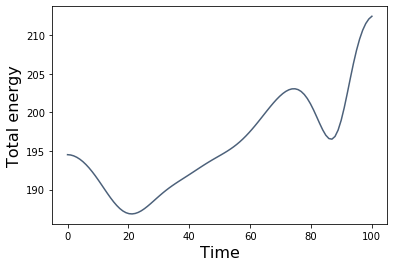

In [458]:
Total_energy_for_002 = Table().with_columns("Time",Time002ps, "Total energy", Total_energy002)
Total_energy_for_002.plot(0)

In [459]:
# for 0.001

In [460]:

Timefor001 =  np.linspace(0.001,50,50000)
Timefor001

array([1.0000e-03, 2.0000e-03, 3.0000e-03, ..., 4.9998e+01, 4.9999e+01,
       5.0000e+01])

In [461]:
positions001, Total_energy001 = part_e(0.001,50,50000, original_points, velocity3D)

[[-0.00153511 -0.00469563 -0.00132404]
 [-0.0033012  -0.00208269  0.45796251]
 [-0.00273567 -0.00211031  0.91849349]
 [-0.00184491  0.4586626  -0.00433899]
 [-0.00330788  0.45732847  0.45576819]
 [-0.00452381  0.45804718  0.91727984]
 [-0.00431201  0.91732102 -0.00351522]
 [-0.00375751  0.91716075  0.45510024]
 [-0.00374007  0.91814138  0.91840772]
 [ 0.45643975 -0.00296481 -0.00429862]
 [ 0.45879106 -0.00257233  0.45808134]
 [ 0.4584919  -0.00235934  0.91718638]
 [ 0.4580632   0.45686251 -0.00237086]
 [ 0.45778218  0.45684867  0.45853858]
 [ 0.4573581   0.45657552  0.91737219]
 [ 0.45558405  0.91545394 -0.00224076]
 [ 0.45606402  0.91796152  0.45599445]
 [ 0.45617827  0.91704042  0.91535745]
 [ 0.91752877 -0.0020251  -0.00468863]
 [ 0.91741205 -0.00280823  0.45856052]
 [ 0.91772125 -0.00150397  0.91562675]
 [ 0.9161786   0.45860686 -0.00278176]
 [ 0.91592859  0.45624266  0.45549723]
 [ 0.91561371  0.45838626  0.9172667 ]
 [ 0.91680403  0.91877079 -0.00311194]
 [ 0.91657957  0.91609349

In [462]:
Total_energy_for_001 = Table().with_columns("Time",Timefor001, "Total energy", Total_energy001)
Total_energy_for_001.plot(0)

ValueError: Column length mismatch. New column does not have the same number of rows as table.

In [ ]:
#0.005

In [341]:

Timefor005 =  np.linspace(0.005,50,10000)
Timefor005

array([1.0000e-03, 2.0000e-03, 3.0000e-03, ..., 4.9998e+01, 4.9999e+01,
       5.0000e+01])

In [342]:

positions005, Total_energy005 = part_e(0.005,50,10000, original_points, velocity3D)

ValueError: operands could not be broadcast together with shapes (27,3) (27,) 

In [343]:
Total_energy_for_001 = Table().with_columns("Time",Timefor005, "Total energy", Total_energy005)
Total_energy_for_001.plot(0)

NameError: name 'Total_energy005' is not defined

In [230]:
### 4G

In [463]:
def verletv (Fx,dt,m,new_x):
    return (dt/(2*m))*(Fx + calc_force(new_x))

In [464]:
### verlet simulation 

In [465]:
def verlet_sim(x,Fx,dt,m,v):
    step1 = dx(Fx,dt,m,v)
    step2 = step1+x
    step3 = verletv(Fx,dt,m, step2)
    step4 = step3+v
    return (step2, step4)

In [466]:
def verlet(timestep, total_length, record_interval, orig_position, orig_velocity):
    # record_interval is the interval at which we save intermediate cube positions to xyz file
    total_steps = int(total_length / timestep)
    total_intervals = int(total_length / record_interval)
    total_energies = np.zeros(total_steps)
    cube = np.copy(orig_position)
    velocity = np.copy(orig_velocity)
    intermediate_cube = np.array([])
    for i in range(total_steps):
        cube, velocity = verlet_sim(cube, calc_force(cube), timestep, 84, velocity)
        
        potential_energy = number_4_calc_potential_energy(cube)
        kinetic_energy = number4_compute_kinetic_energy(mass_kr, velocity)
        total_energy = potential_energy + kinetic_energy
        total_energies[i] = total_energy
        


        if i % int(total_steps / total_intervals) == 0:
            intermediate_cube = np.append(intermediate_cube, cube)
    return np.reshape(intermediate_cube, [total_intervals, 27, 3]), total_energies

In [467]:
Verlet002ps = np.linspace (0.002,50,25000)
Verlet002ps

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63

In [468]:
verlet002, Total_energy_verlet_002 = verlet(0.002,50,0.1, original_points, velocity3D)
verlet002

array([[[-0.00153511, -0.00469563, -0.00132404],
        [-0.0033012 , -0.00208269,  0.45796251],
        [-0.00273567, -0.00211031,  0.91849349],
        [-0.00184491,  0.4586626 , -0.00433899],
        [-0.00330788,  0.45732847,  0.45576819],
        [-0.00452381,  0.45804718,  0.91727984],
        [-0.00431201,  0.91732102, -0.00351522],
        [-0.00375751,  0.91716075,  0.45510024],
        [-0.00374007,  0.91814138,  0.91840772],
        [ 0.45643975, -0.00296481, -0.00429862],
        [ 0.45879106, -0.00257233,  0.45808134],
        [ 0.4584919 , -0.00235934,  0.91718638],
        [ 0.4580632 ,  0.45686251, -0.00237086],
        [ 0.45778218,  0.45684867,  0.45853858],
        [ 0.4573581 ,  0.45657552,  0.91737219],
        [ 0.45558405,  0.91545394, -0.00224076],
        [ 0.45606402,  0.91796152,  0.45599445],
        [ 0.45617827,  0.91704042,  0.91535745],
        [ 0.91752877, -0.0020251 , -0.00468863],
        [ 0.91741205, -0.00280823,  0.45856052],
        [ 0.91772125

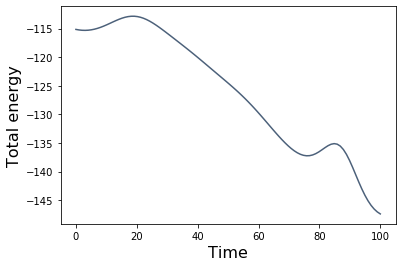

In [469]:
Total_energy_for_verlet = Table().with_columns("Time",Verlet002ps, "Total energy", Total_energy_verlet_002)
Total_energy_for_verlet.plot(0)

In [ ]:
# 5a

In [470]:
# 𝜎 ij
(0.332840+ 0.440104)/2

0.38647200000000004

In [471]:
# 𝜖 ij 
np.sqrt(0.011590* 0.418400)

0.06963659957235131

In [472]:
#5a

In [473]:
def number5_Ulj(r2,r1):
    difference = (r1[0]-r2[0])**2 + (r1[1]-r2[1])**2 + (r1[2]-r2[2])**2
    radius = math.sqrt(difference)
    potential = (4*0.0696)*((0.38647/radius)**12 - (0.38647/radius)**6)
    return potential

In [474]:
def coulomb_PE (r2,r1):
    difference = (r1[0]-r2[0])**2 + (r1[1]-r2[1])**2 + (r1[2]-r2[2])**2
    radius = math.sqrt(difference)
    return -138.935456/radius

In [475]:
# computes total energy
def crystal_energy (r2,r1):
    return coulomb_PE(r2,r1) + number5_Ulj(r2,r1)

In [476]:
def number_5_Force(r2,r1):
    # Force acting on r2, which is the first argument to the function.
    output_coordinates = np.zeros([1, 3])
    difference = (r1[0]-r2[0])**2 + (r1[1]-r2[1])**2 + (r1[2]-r2[2])**2
    radius = math.sqrt(difference)
    potential = (-4*0.0696)*(((12*(0.38647**12))*((1/radius)**13)) - ((6*(0.38647**6))*((1/radius)**7)))
    for i in range(3):
        force12 = potential*((r1[i]-r2[i])/radius)
        output_coordinates[0][i] = force12
    return output_coordinates

In [477]:
def coulomb_force (r2,r1) :
    output_coordinates = np.zeros([1, 3])
    difference = (r1[0]-r2[0])**2 + (r1[1]-r2[1])**2 + (r1[2]-r2[2])**2
    radius = math.sqrt(difference)
    coulomb = 138.935456*((1/radius)**2)
    for i in range(3):
        force12 = coulomb*((r1[i]-r2[i])/radius)
        output_coordinates[0][i] = force12
    return output_coordinates

In [478]:
# computes total force


def total_force_crystal(chart):
    array_for_each_point = []
    for i in range(len(chart)):
        array_for_each_point.append([])
        for j in range(len(chart)):
            if i != j:
                yfor2 = number_5_Force(chart[i], chart[j]) + coulomb_force(chart[i], chart[j])
                array_for_each_point[i].append(yfor2)
    force_pair = []
    for i in range(len(chart)):
        force_pair.append(np.zeros([1,3]))
        for j in range(len(array_for_each_point[i])):
            force_pair[i] = np.add(force_pair[i], array_for_each_point[i][j])
    return np.array(force_pair).reshape(-1,3)

In [479]:
# 5b

In [480]:
counter = 0
b = np.zeros([64,3])

for i in range(4):
    for j in range(4):
        for k in range(4):
            b[counter] = make_array(i,j,k)
            counter += 1
            
# Rmin Na = 2^(1/6)* 0.332840 = 0.373600
# Rmin Cl = 2^(1/6)* 0.440104 = 0.494000
for i in range(len(b)):
    if i % 2 == 0:
        b[i] *= 0.373600
    else:
        b[i] *= 0.494000

b

array([[0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.494 ],
       [0.    , 0.    , 0.7472],
       [0.    , 0.    , 1.482 ],
       [0.    , 0.3736, 0.    ],
       [0.    , 0.494 , 0.494 ],
       [0.    , 0.3736, 0.7472],
       [0.    , 0.494 , 1.482 ],
       [0.    , 0.7472, 0.    ],
       [0.    , 0.988 , 0.494 ],
       [0.    , 0.7472, 0.7472],
       [0.    , 0.988 , 1.482 ],
       [0.    , 1.1208, 0.    ],
       [0.    , 1.482 , 0.494 ],
       [0.    , 1.1208, 0.7472],
       [0.    , 1.482 , 1.482 ],
       [0.3736, 0.    , 0.    ],
       [0.494 , 0.    , 0.494 ],
       [0.3736, 0.    , 0.7472],
       [0.494 , 0.    , 1.482 ],
       [0.3736, 0.3736, 0.    ],
       [0.494 , 0.494 , 0.494 ],
       [0.3736, 0.3736, 0.7472],
       [0.494 , 0.494 , 1.482 ],
       [0.3736, 0.7472, 0.    ],
       [0.494 , 0.988 , 0.494 ],
       [0.3736, 0.7472, 0.7472],
       [0.494 , 0.988 , 1.482 ],
       [0.3736, 1.1208, 0.    ],
       [0.494 , 1.482 , 0.494 ],
       [0.

In [481]:
write_to_xyz("lattice.xyz", b)

(64, 3)


In [482]:
# 5c

In [483]:
def energystep(cube):
    testenergy = []
    for i in range(len(cube)):
        for j in range(len(cube)):
            if i < j:
                Efor3 = crystal_energy(cube[i],cube[j])
                testenergy.append(Efor3)
    return np.sum(testenergy)

In [484]:
#steepest descent

def steepest_descent(step_size, cube):
    new_cube = cube
    energy = energystep(cube)
    forces = calc_force(cube)
    for i in range(10):
        displacement = forces * step_size / np.linalg.norm(forces)
        new_cube += displacement
        print(energystep(new_cube))
        forces = calc_force(new_cube)
    return energystep(new_cube)

In [485]:
Part2energy = steepest_descent(0.001, b)
Part2energy

-283247.23616465006
-283242.3354425523
-283237.1270985477
-283231.6242491312
-283225.8396208243
-283219.7855791628
-283213.47413907916
-283206.91696082655
-283200.12533567136
-283193.1101653882


-283193.1101653882

In [486]:
# Get masses of the NA and CL atoms in lattice
nacl_masses = np.zeros(b.shape)
for i in range(b.shape[0]):
    nacl_masses[i] = np.full(3, 23) if i % 2 == 0 else np.full(3, 35)

In [487]:

def re_calling_thermostat(mass, temp):
    while True:
        # generate random numbers
        thermo_x = random.uniform((-1)*ranges, ranges)
        thermo_y = random.uniform(0, the_maxstandard)
        # scale random points - not needed
        scaled_x = (-1)*ranges + thermo_x*(2*ranges)
        scaled_y = thermo_y*(the_maxstandard)
        
        actual_y = standardmaxwell(mass, k, temp, scaled_x)
        if scaled_y < actual_y:
            return scaled_x

In [488]:
def reset_velocity(temp):
    nacl_velocity = np.zeros([64, 3])
    for i in range(nacl_velocity.shape[0]):
        mass = 23 if i % 2 == 0 else 35
        for j in range(3):
                nacl_velocity[i][j] = re_calling_thermostat(mass, temp)
            
    return nacl_velocity

In [489]:
def nacl_dx (Fx,dt,m,v):
    top = Fx*(dt**2)
    total = top/(2*m)
    return v*dt + total

In [490]:
def nacl_dv(Fx,dt,m):
    return (Fx/m)*dt

In [491]:
def nacl_verlet_sim(x,Fx,dt,m,v):
    step1 = nacl_dx(Fx,dt,m,v)
    step2 = step1+x
    step3 = verletv(Fx,dt,m, step2)
    step4 = step3+v
    return (step2, step4)

In [492]:
# the verlet of 5c


def nacl_verlet(timestep, total_length, record_interval, orig_position, temp):
    # record_interval is the interval at which we save intermediate cube positions to xyz file
    total_steps = int(total_length / timestep)
    total_intervals = int(total_length / record_interval)
    total_energies = np.zeros(total_steps)
    cube = np.copy(orig_position)
    velocity = reset_velocity(temp)
    intermediate_cube = np.array([])
    for i in range(total_steps):
        cube, velocity = nacl_verlet_sim(cube, total_force_crystal(cube), timestep, nacl_masses, velocity)
        
        potential_energy = number_4_calc_potential_energy(cube)
        kinetic_energy = number4_compute_kinetic_energy(mass_kr, velocity)
        total_energy = potential_energy + kinetic_energy
        total_energies[i] = total_energy
        

        if i % int(total_steps / total_intervals) == 0:
            intermediate_cube = np.append(intermediate_cube, cube)
    return np.reshape(intermediate_cube, [total_intervals, orig_position.shape[0], orig_position.shape[1]]), total_energies

In [493]:
#Verlet5C 
Verlet5C = nacl_verlet(0.005, 10,0.1, b, 1200)
Verlet5C

(array([[[ 4.96649143e-03,  3.95094521e-03,  3.21049577e-03],
         [ 4.65763973e-03,  4.88763659e-03,  4.84943945e-01],
         [ 7.38168176e-03,  6.95006540e-03,  7.45160948e-01],
         ...,
         [ 1.47405074e+00,  1.47473803e+00,  4.90770889e-01],
         [ 1.11079523e+00,  1.10809103e+00,  7.40347262e-01],
         [ 1.47607377e+00,  1.47610023e+00,  1.47745054e+00]],
 
        [[ 1.51046780e-02,  1.32885872e-02,  1.37216102e-02],
         [ 1.16392665e-02,  1.31291786e-02,  7.78285379e-02],
         [ 2.77929283e-02,  2.54363369e-02,  1.35001954e+00],
         ...,
         [ 1.46089316e+00,  1.46226738e+00,  4.88437249e-01],
         [ 1.11734347e+00,  1.11174588e+00,  7.70109855e-01],
         [ 1.46649169e+00,  1.46653934e+00,  1.47028363e+00]],
 
        [[ 1.11443570e+07,  5.12639248e+05, -2.06160361e+08],
         [-7.32343457e+06, -3.36877177e+05,  1.35476808e+08],
         [ 8.40066292e+03,  8.56360690e+03, -4.30043091e+04],
         ...,
         [ 1.44245344e

In [262]:
# 5d 

In [497]:
def radius_of_gyration(cube):
    r_mean = cube.sum(axis=0) / cube.shape[0]
    sigma_sum = 0
    
    for i in range(cube.shape[0]):
        for j in range(cube.shape[1]):
            sigma_sum += (cube[i][j] - r_mean[j]) ** 2
    return np.sqrt(sigma_sum / cube.shape[0])

In [498]:
def const_temp_simulation(timestep_ps, total_length_ps, record_interval_ps, orig_position, temp):
    # record_interval is the interval at which we save intermediate cube positions to xyz file
    total_steps = int(total_length_ps / timestep_ps)
    total_record_intervals = int(total_length_ps / record_interval_ps)
    total_energies = np.zeros(total_steps)
    cube = np.copy(orig_position)
    velocity = reset_velocity(temp)
    radius_arr = np.array([])
    for i in range(total_steps):
        cube, velocity = nacl_verlet_sim(cube, total_force_crystal(cube), timestep_ps, nacl_masses, velocity)

        # reset velocity every 1ps
        if i % (total_steps / total_length_ps) == 0:
            reset_velocity(temp)
        
        # record radius of gyration
        if i % int(total_steps / total_record_intervals) == 0:
            radius_arr = np.append(radius_arr, radius_of_gyration(cube))
    return radius_arr

In [499]:

K1200 = const_temp_simulation(0.005, 5000, 1, b, 1200)

In [ ]:
# 5e

In [500]:
time_for_5 = np.linspace(0,5000,50000)
time_for_5

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

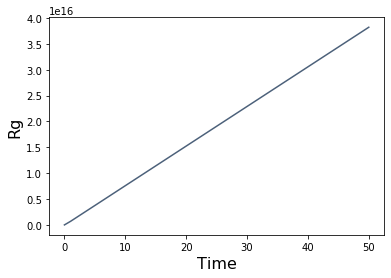

In [501]:
Rg = Table().with_columns("Time",time_for_5, "Rg", K1200)
Rg.plot(0)

In [514]:
# this is what thermal EQ is
estimateEQ = Rg.where("Time",are.between(4000,5000)).column("Rg")
estimating = np.average(estimateEQ)
estimating

2.2974380858708656e+16

In [502]:
Thermal_eq = Rg.where('Time', are.above(4000)).column("Rg")
Thermal_eq

array([1.55506864e+16, 1.63321279e+16, 1.71135694e+16, 1.78950109e+16,
       1.86764525e+16, 1.94578940e+16, 2.02393355e+16, 2.10207770e+16,
       2.18022186e+16, 2.25836601e+16, 2.33651016e+16, 2.41465431e+16,
       2.49279847e+16, 2.57094262e+16, 2.64908677e+16, 2.72723093e+16,
       2.80537508e+16, 2.88351923e+16, 2.96166338e+16, 3.03980754e+16,
       3.11795169e+16, 3.19609584e+16, 3.27423999e+16, 3.35238415e+16,
       3.43052830e+16, 3.50867245e+16, 3.58681660e+16, 3.66496076e+16,
       3.74310491e+16, 3.82124906e+16])

In [503]:
average_1200 = np.average(Thermal_eq)
average_1200

2.688158848774071e+16

In [504]:
Varience = np.var(Thermal_eq)
Varience

4.574792679757753e+31

In [505]:
from scipy.stats import sem

In [506]:
standard_error = sem(Thermal_eq)
standard_error

1255991527502413.5

In [ ]:
# 5f

In [515]:
K1400 = const_temp_simulation(0.005, 5000, 1, b, 1400)
K1400

array([8.75552817e-01, 1.03185919e+10, 2.29412190e+10, 3.62293149e+10,
       4.96514303e+10, 6.31221304e+10, 7.66157928e+10, 9.01221039e+10,
       1.03636119e+11, 1.17155171e+11, 1.30677697e+11, 1.44202721e+11,
       1.57729599e+11, 1.71257892e+11, 1.84787289e+11, 1.98317564e+11,
       2.11848550e+11, 2.25380118e+11, 2.38912169e+11, 2.52444625e+11,
       2.65977425e+11, 2.79510519e+11, 2.93043866e+11, 3.06577432e+11,
       3.20111190e+11, 3.33645116e+11, 3.47179191e+11, 3.60713398e+11,
       3.74247723e+11, 3.87782153e+11, 4.01316677e+11, 4.14851287e+11,
       4.28385974e+11, 4.41920731e+11, 4.55455552e+11, 4.68990432e+11,
       4.82525365e+11, 4.96060347e+11, 5.09595375e+11, 5.23130444e+11,
       5.36665551e+11, 5.50200695e+11, 5.63735871e+11, 5.77271078e+11,
       5.90806314e+11, 6.04341577e+11, 6.17876864e+11, 6.31412175e+11,
       6.44947508e+11, 6.58482861e+11])

In [ ]:
Rg1400 = Table().with_columns("Time",time_for_5, "Rg", K1400)
estimateEQ1400 = Rg1400.where("Time",are.between(4000,5000)).column("Rg")
average_1400 = np.average(estimateEQ1400)
average_1400

327042215729.1919

1.906873611272817e+16

In [521]:
alpha = (1/average_1200)*((average_1400-average_1200)/200)
alpha

-0.004999914246488652

In [ ]:
K1300 = const_temp_simulation(0.005, 5000, 1, b, 1300)

Rg1300 = Table().with_columns("Time",time_for_5, "Rg", K1400)
estimateEQ1300 = Rg1300.where("Time",are.between(4000,5000)).column("Rg")
average_1300 = np.average(estimateEQ1300)
average_1300

average_1300 = np.average(K1300)

In [ ]:
alpha1300_1400 = (1/average_1300)*((average_1400-average_1300)/100
alpha1300_1400 